<a href="https://colab.research.google.com/github/prieto-daniel/Data-Science-I/blob/main/Entregables/Datasets_Prieto_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Historico de movimientos encriptado
url = 'https://raw.githubusercontent.com/prieto-daniel/Data-Science-I/refs/heads/main/Datos/TH.csv'
df = pd.read_csv(url, delimiter=';')
print(f'Rows: {len(df)}')

# Como el archivo es una conversion de excel a csv, las fechas las tomo como INT, el origen del excel es 1899-12-30, como dia 0 para la base del calculo.
df['FECHA_DATE'] = pd.to_datetime(df['FECHA'], unit = 'D', origin='1899-12-30')

# Excluyo periodos anteriores al año 2023
df = df[df['PERIODO'] >= 202301]

df.head()

Rows: 95767


,ID,AGENTE,CANAL,SEGMENTO,ESTADO,ZONA,PROVINCIA,PERIODO,BP,QR,PEICI,PEICO,IOB,IIB,DOB,DIB,FECHA,FECHA_DATE
0,QjAyMDM=,Q09SUkVPIExBIFBMQVRBIC0gMw==,Agte Corporativo,-,ACTIVO,AMBA,BUENOS AIRES,202405,0,0,0,0,0,1,0,0,45413,2024-05-01
1,QjA1NDA=,Q09SUkVPIENMQVJPTUVDTw==,Agte Corporativo,-,ACTIVO,INTERIOR,BUENOS AIRES,202403,0,0,0,0,10,4,0,0,45352,2024-03-01
2,QjA1NDA=,Q09SUkVPIENMQVJPTUVDTw==,Agte Corporativo,-,ACTIVO,INTERIOR,BUENOS AIRES,202404,0,0,0,0,6,2,0,0,45383,2024-04-01
3,QjA1NDA=,Q09SUkVPIENMQVJPTUVDTw==,Agte Corporativo,-,ACTIVO,INTERIOR,BUENOS AIRES,202405,0,0,0,0,6,1,0,0,45413,2024-05-01
4,QjA1NDk=,Q09SUkVPIENBUkhVRQ==,Agte Corporativo,3.B,ACTIVO,INTERIOR,BUENOS AIRES,202403,0,0,0,0,13,9,0,0,45352,2024-03-01


In [ ]:
provincias:list[str] = df['PROVINCIA'].unique()
bp:list[int] = []

for provincia in provincias:
    datos_provincia:list[int] = df[df['PROVINCIA'] == provincia]['BP'].astype(int)
    bp.append(sum(datos_provincia))

data = {
    "PROVINCIA" : provincias,
    "BP" : bp
}

dataset = pd.DataFrame(data)

dataset.head()

,PROVINCIA,BP
0,BUENOS AIRES,68601043
1,CAPITAL FEDERAL,21948691
2,ENTRE RIOS,4298052
3,SANTIAGO DEL ESTERO,3850512
4,CHACO,2785092


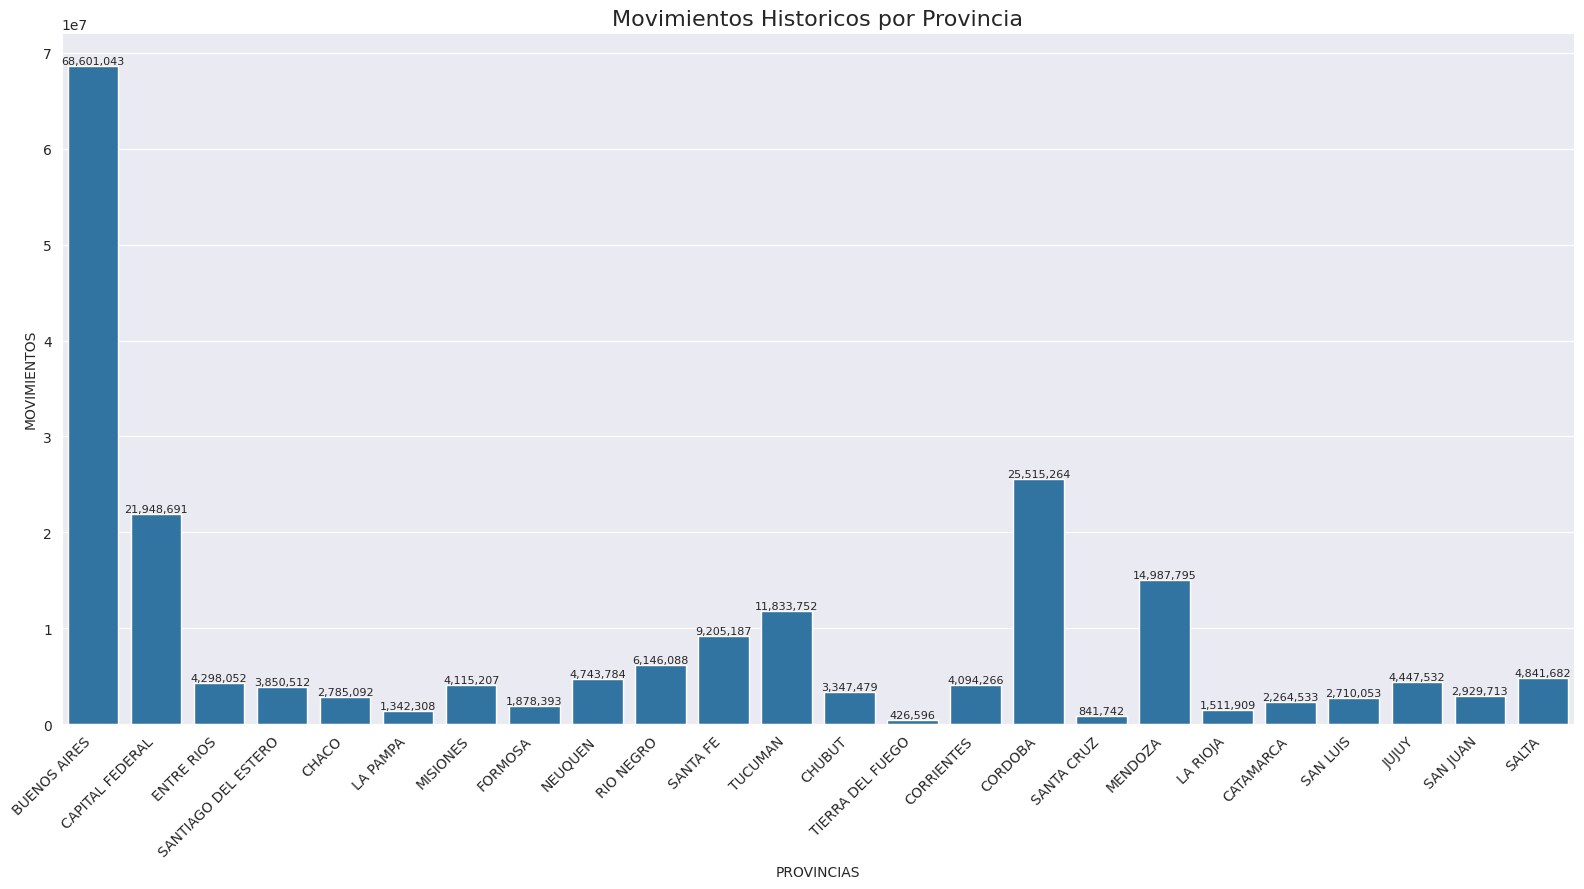

In [ ]:
# Visualizar los datos
plt.figure(figsize = (16, 9))
sns.set_style("darkgrid")
ax = sns.barplot(x = "PROVINCIA", y = "BP", data = dataset)
plt.title('Movimientos Historicos por Provincia', fontsize = 16)
plt.xlabel('PROVINCIAS', fontsize = 10)
plt.ylabel('MOVIMIENTOS', fontsize = 10)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

ax.bar_label(ax.containers[0], fmt='{:,.0f}', fontsize=8)

plt.show()